<a href="https://colab.research.google.com/github/utkarshni/cipherschool/blob/main/internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files  # Import necessary modules for file upload
import pandas as pd  # Pandas for data handling
import numpy as np  # NumPy for numerical operations
import os  # OS module to handle file paths
import cv2  # OpenCV for image processing
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow.keras.applications import ResNet50  # Import ResNet50 for feature extraction
from tensorflow.keras.applications.resnet50 import preprocess_input  # Preprocessing function for ResNet50
from sklearn.metrics.pairwise import cosine_similarity  # Function to compute similarity between feature vectors
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving styles.csv to styles.csv


In [ ]:
dataset_filename = list(uploaded.keys())[0]
dataset_filename

'styles.csv'

In [ ]:
df = pd.read_csv(dataset_filename, on_bad_lines='skip')
df


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [ ]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def preprocess_image(img_path):  # img_path should be the path to an individual image
    img = cv2.imread(img_path)  # Read the image from the given path
    img = cv2.resize(img, (224, 224))  # Resize image to fit ResNet50 input size
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)  # Normalize the image for ResNet50 processing
    return img

In [ ]:
def extract_features(img_path):  # img_path should be the path to an individual image
    img = preprocess_image(img_path)  # Preprocess the given image
    features = model.predict(img)  # Extract features using ResNet50
    return features


In [ ]:
print("Please upload image files (skip large uploads)")
uploaded_images = files.upload()

Please upload image files (skip large uploads)


Saving 1525 - Copy.jpg to 1525 - Copy (1).jpg
Saving 1525.jpg to 1525.jpg
Saving 1526 - Copy.jpg to 1526 - Copy.jpg
Saving 1526.jpg to 1526.jpg
Saving 1528 - Copy.jpg to 1528 - Copy.jpg
Saving 1528.jpg to 1528.jpg
Saving 1529.jpg to 1529.jpg
Saving 1530.jpg to 1530.jpg
Saving 1531 - Copy.jpg to 1531 - Copy.jpg
Saving 1531.jpg to 1531.jpg
Saving 1532 - Copy.jpg to 1532 - Copy.jpg
Saving 1532.jpg to 1532.jpg
Saving 1533 - Copy.jpg to 1533 - Copy.jpg
Saving 1533.jpg to 1533.jpg
Saving 1534.jpg to 1534.jpg
Saving 1535.jpg to 1535.jpg
Saving 1536.jpg to 1536.jpg
Saving 1537.jpg to 1537.jpg
Saving 1538.jpg to 1538.jpg
Saving 1539.jpg to 1539.jpg
Saving 1540.jpg to 1540.jpg
Saving 1541.jpg to 1541.jpg
Saving 1542.jpg to 1542.jpg
Saving 1543.jpg to 1543.jpg
Saving 1544.jpg to 1544.jpg
Saving 1545.jpg to 1545.jpg
Saving 1546.jpg to 1546.jpg
Saving 1547.jpg to 1547.jpg
Saving 1548.jpg to 1548.jpg
Saving 1549.jpg to 1549.jpg
Saving 1550.jpg to 1550.jpg
Saving 1551.jpg to 1551.jpg
Saving 1552.jpg 

In [ ]:
image_folder = "uploaded_images"  # Name of the folder where uploaded images will be saved
os.makedirs(image_folder, exist_ok=True)

In [ ]:
for filename in uploaded_images.keys():  # Iterate through all uploaded images
    with open(os.path.join(image_folder, filename), "wb") as f:  # Open a file in binary write mode
        f.write(uploaded_images[filename])

In [ ]:
image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]  # Collect all image file paths


In [ ]:
features_list = []
for img_path in image_paths:  # Iterate through all image paths
    features = extract_features(img_path)  # Extract features from each image
    features_list.append(features.flatten())  # Flatten the extracted feature vector and store it



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
features_list = np.array(features_list)
features_list

array([[1.4178885 , 3.7557151 , 0.29995266, ..., 0.23371781, 1.2536265 ,
        0.83961993],
       [0.11508814, 0.46795657, 0.        , ..., 1.5656472 , 0.72107077,
        0.05364879],
       [0.5816389 , 2.4075224 , 0.22548173, ..., 0.        , 1.4788929 ,
        0.15941817],
       ...,
       [0.        , 1.0795709 , 0.00483839, ..., 0.08564138, 0.        ,
        1.5241575 ],
       [0.21421917, 0.14607698, 3.058622  , ..., 1.5819403 , 0.13795057,
        0.22891204],
       [0.        , 2.5457394 , 0.09461199, ..., 1.6099889 , 0.63335526,
        1.4173069 ]], dtype=float32)

In [ ]:
def recommend_fashion(image_path, top_n=5):  # image_path should be the path to the query image
    query_features = extract_features(image_path)  # Extract features from the query image
    similarities = cosine_similarity(query_features.reshape(1, -1), features_list)  # Compute similarity scores
    indices = np.argsort(similarities[0])[::-1][:top_n]  # Get indices of top N similar images

    fig, axes = plt.subplots(1, top_n, figsize=(20, 5))  # Create a subplot for visualization
    for i, idx in enumerate(indices):  # Iterate through top N recommendations
        recommended_img = cv2.imread(image_paths[idx])  # Read the recommended image
        recommended_img = cv2.cvtColor(recommended_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB format for display
        axes[i].imshow(recommended_img)  # Display the recommended image
        axes[i].axis('off')  # Remove axis labels
        axes[i].set_title(f"Recommendation {i+1}")  # Set title for the recommended image
    plt.show()

In [ ]:
print("Upload a test image:")
uploaded_test_image = files.upload()  # Prompt user to upload a test image
uploaded_image_path = list(uploaded_test_image.keys())[0]

Upload a test image:


Saving 1525 - Copy.jpg to 1525 - Copy (2).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


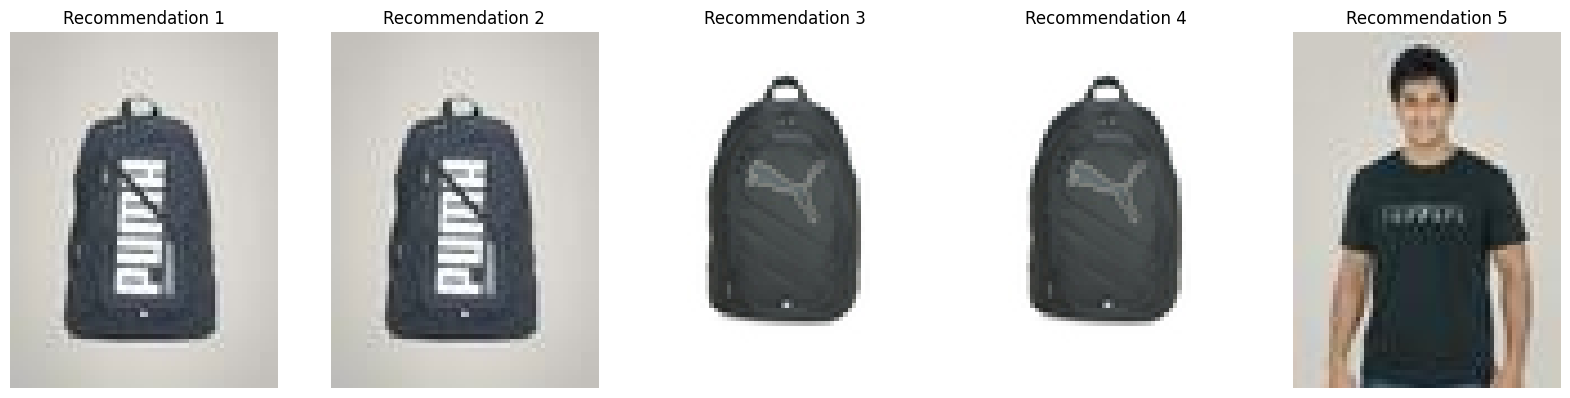

In [ ]:
recommend_fashion(uploaded_image_path)